In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# Dados fornecidos
cliente_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # 10 IDs de cliente
valor_compra = np.array([40.0, 150.0, 500.0, 5000.0, 1834.0, 2350.0, 5000.0, 6740.0, 895.0, 3300.0])  # 10 valores de compra

In [6]:
# Criando uma matriz numpy para os valores das compras
dados = np.column_stack((cliente_id, valor_compra))

In [7]:
# Convertendo para um DataFrame do pandas
df = pd.DataFrame(dados, columns=['Cliente ID', 'Valor da Compra'])

In [8]:
# Definindo o número de clusters (K) - escolha inicial
K = 4

In [10]:
# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=K, random_state=42)
df['Grupo'] = kmeans.fit_predict(df[['Valor da Compra']])

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Avaliando o desempenho do modelo usando a soma dos erros quadrados (SSE)
sse = kmeans.inertia_

In [12]:
# Avaliando a silhueta
silhouette_avg = silhouette_score(df[['Valor da Compra']], df['Grupo'])

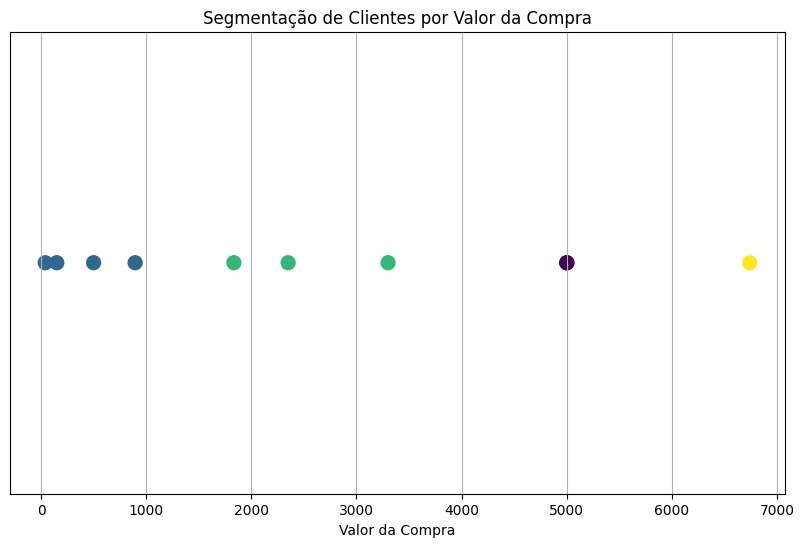

In [13]:
# Visualizando os resultados da segmentação
plt.figure(figsize=(10, 6))
plt.scatter(df['Valor da Compra'], np.zeros_like(df['Valor da Compra']), c=df['Grupo'], cmap='viridis', s=100)
plt.title('Segmentação de Clientes por Valor da Compra')
plt.xlabel('Valor da Compra')
plt.yticks([])  # Remove os ticks do eixo Y
plt.grid()
plt.show()

In [14]:
# Resultados
df['Grupo'].value_counts(), sse, silhouette_avg

(Grupo
 1    4
 2    3
 0    2
 3    1
 Name: count, dtype: int64,
 1553039.4166666667,
 0.6243062723761966)